In [264]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
city_data= pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
pyber_df = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

In [265]:
avg_fare = pyber_df.groupby("city")["fare"].mean()
rides_per_city = pyber_df.groupby("city")["ride_id"].count()
city_type = pyber_df.groupby("city")["type"].first()
drivers_per_city = pyber_df.groupby("city")["driver_count"].mean()
drivers_per_city_boosted = (drivers_per_city * 5)
my_dict = {"Average Fare ($)" : avg_fare, "City Types" : city_type, "Drivers Per City" : drivers_per_city_boosted, "Total Number of Rides (Per City)" : rides_per_city}
scatter_data = pd.DataFrame(my_dict)

In [266]:
Rural = scatter_data[scatter_data["City Types"]=="Rural"]
Suburban = scatter_data[scatter_data["City Types"]=="Suburban"]
Urban = scatter_data[scatter_data["City Types"]=="Urban"]
Rural_fare = Rural["Average Fare ($)"]
Rural_rides = Rural["Total Number of Rides (Per City)"]
Rural_drivers = Rural["Drivers Per City"]
Suburban_fare = Suburban["Average Fare ($)"]
Suburban_rides = Suburban["Total Number of Rides (Per City)"]
Suburban_drivers = Suburban["Drivers Per City"]
Urban_fare = Urban["Average Fare ($)"]
Urban_rides = Urban["Total Number of Rides (Per City)"]
Urban_drivers = Urban["Drivers Per City"]

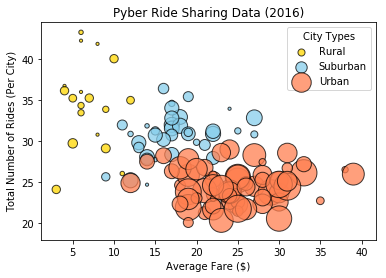

In [267]:
plt.scatter(Rural_rides, Rural_fare, label = "Rural" ,marker="o", facecolors="gold", edgecolors="black",
            s=Rural_drivers * 2, alpha=.75)
plt.scatter(Suburban_rides, Suburban_fare, label = "Suburban" ,marker="o", facecolors="skyblue", edgecolors="black",
            s=Suburban_drivers * 2, alpha=.75)
plt.scatter(Urban_rides, Urban_fare, label = "Urban", marker="o", facecolors="coral", edgecolors="black",
            s=Urban_drivers * 2, alpha=.75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
legend = plt.legend(title= "City Types", loc="best") 
plt.show()

([<matplotlib.patches.Wedge at 0x2148ed2ea90>,
 [Text(-0.7397553529356278, 0.8141019701505979, 'Rural'),
  Text(-1.0378230257251992, -0.3645865703431664, 'Suburban'),
  Text(1.2900437177559707, 0.16058395398779388, 'Urban')],
 [Text(-0.4035029197830696, 0.44405562008214433, '6.8%'),
  Text(-0.5660852867591996, -0.19886540200536348, '30.5%'),
  Text(0.7938730570805972, 0.09882089476171929, '62.7%')])

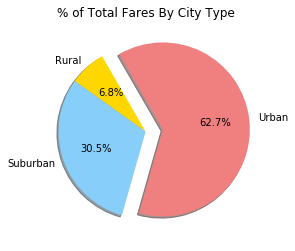

In [268]:
sum_fare = pyber_df.groupby("type")["fare"].sum()
Rural_t = sum_fare["Rural"]
Suburban_t = sum_fare["Suburban"]
Urban_t = sum_fare["Urban"]
fare_total = sum_fare.sum()
rural_fare = (Rural_t / fare_total)
suburban_fare = (Suburban_t / fare_total)
urban_fare = (Urban_t / fare_total)
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_fare, suburban_fare, urban_fare]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Fares By City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

([<matplotlib.patches.Wedge at 0x2148ed757b8>,
 [Text(-0.6992961240770076, 0.8491083151464687, 'Rural'),
  Text(-1.0933237411737993, -0.12100907811287187, 'Suburban'),
  Text(1.2980259785976411, -0.07161395733819279, 'Urban')],
 [Text(-0.3814342494965495, 0.46314999007989194, '5.3%'),
  Text(-0.5963584042766178, -0.06600495169793011, '26.3%'),
  Text(0.7987852175985484, -0.044070127592734015, '68.4%')])

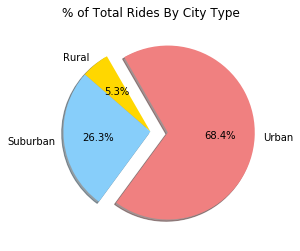

In [269]:
rides_count = pyber_df.groupby("type")["ride_id"].count()
rides_total = rides_count.sum()
Rural_r = rides_count["Rural"]
Suburban_r = rides_count["Suburban"]
Urban_r = rides_count["Urban"]
rural_rides = (Rural_r / rides_total)
suburban_rides = (Suburban_r / rides_total)
urban_rides = (Urban_r / rides_total)
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_rides, suburban_rides, urban_rides]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Rides By City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

([<matplotlib.patches.Wedge at 0x2148edbe470>,
 [Text(-0.626562605776597, 0.9041124382743779, 'Rural'),
  Text(-1.0277071317750153, 0.39219644478089255, 'Suburban'),
  Text(1.1722793813859391, -0.5619261979810161, 'Urban')],
 [Text(-0.3417614213326892, 0.49315223905875155, '2.6%'),
  Text(-0.5605675264227356, 0.21392533351685045, '16.5%'),
  Text(0.7214026962375009, -0.3458007372190868, '80.9%')])

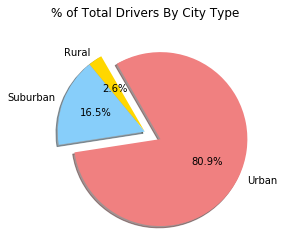

In [270]:
driver_count = city_data.groupby("type")["driver_count"].sum()
driver_total = driver_count.sum()
Rural_d = driver_count["Rural"]
Suburban_d = driver_count["Suburban"]
Urban_d = driver_count["Urban"]
rural_driver = (Rural_d / driver_total)
suburban_driver = (Suburban_d / driver_total)
urban_driver = (Urban_d / driver_total)
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_driver, suburban_driver, urban_driver]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Drivers By City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)